In [2]:
import pandas as pd
import os

In [3]:
os.getcwd()

'C:\\Users\\rajat\\Desktop\\python for ds'

In [4]:
movie = pd.read_csv("Movie.csv")

In [5]:
movie

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [10]:
movie.columns  = ["Film","Genre","RottenTomatoes","AudienceRating","Budget","Year"]

In [57]:
movie.Genre


0         Comedy
1      Adventure
2         Action
3      Adventure
4         Comedy
         ...    
554       Comedy
555       Comedy
556     Thriller
557       Action
558       Comedy
Name: Genre, Length: 559, dtype: category
Categories (7, object): [Action, Adventure, Comedy, Drama, Horror, Romance, Thriller]

In [12]:
movie[["Year","Film"]].head()

,Year,Film
0,2009,(500) Days of Summer
1,2008,"10,000 B.C."
2,2009,12 Rounds
3,2010,127 Hours
4,2009,17 Again


In [13]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   RottenTomatoes  559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   Budget          559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [14]:
movie.describe()

,RottenTomatoes,AudienceRating,Budget,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [15]:
movie.Year = movie.Year.astype("category")
movie.Film = movie.Film.astype("category")
movie.Genre = movie.Genre.astype("category")

In [16]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   RottenTomatoes  559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   Budget          559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [18]:
movie.describe()

,RottenTomatoes,AudienceRating,Budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [177]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

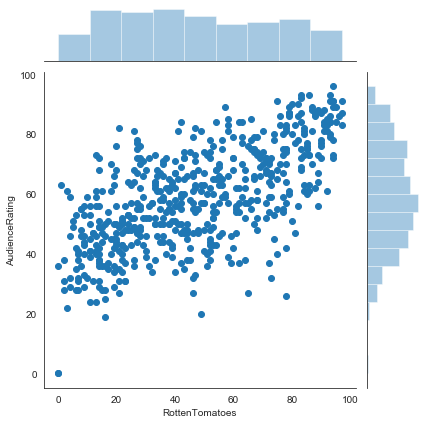

In [421]:
c1 = sns.jointplot(data = movie, x= "RottenTomatoes", y = "AudienceRating")

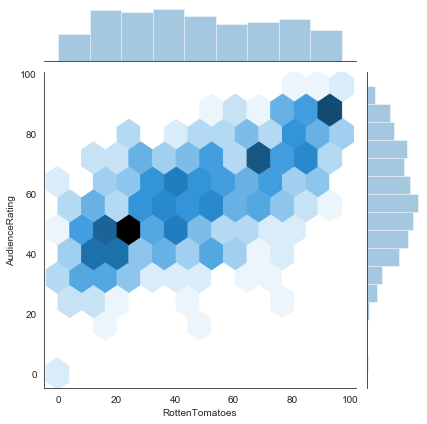

In [48]:
c1 = sns.jointplot(data = movie, x= "RottenTomatoes", y = "AudienceRating",kind = "hexa")

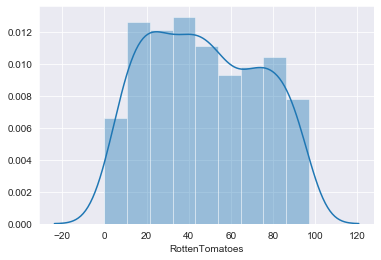

In [55]:
sns.set_style("darkgrid")
c2 = sns.distplot(movie.RottenTomatoes)


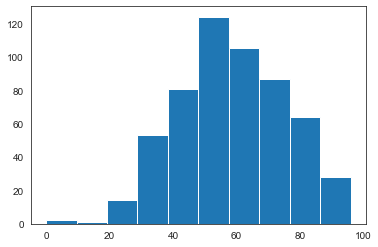

In [58]:
sns.set_style("white")
c3 = plt.hist(movie.AudienceRating)


stacked hoistogram

In [158]:
 f1 = movie[(movie.Genre == "Action") & (movie.Budget>100)]

f1.tail()



,Film,Genre,RottenTomatoes,AudienceRating,Budget,Year
501,Transformers: Revenge of the Fallen,Action,20,76,210,2009
504,Tron: Legacy,Action,50,67,170,2010
531,Watchmen,Action,64,68,130,2009
546,X-Men Origins: Wolverine,Action,37,72,150,2009
547,X-Men: First Class,Action,87,88,160,2011


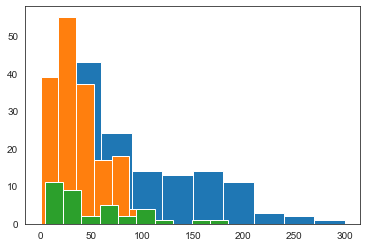

In [103]:
movie[movie.Genre == "Action"].Budget
plt.hist(movie[movie.Genre == "Action"].Budget)
plt.hist(movie[movie.Genre == "Comedy"].Budget)
plt.hist(movie[movie.Genre == "Thriller"].Budget)
plt.show()

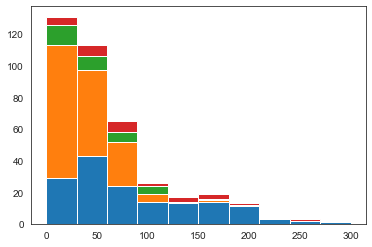

In [122]:
plt.hist([movie[movie.Genre == "Action"].Budget
          ,movie[movie.Genre == "Comedy"].Budget
          , movie[movie.Genre == "Thriller"].Budget
          , movie[movie.Genre == "Adventure"].Budget],stacked=True)
plt.show()

In [127]:

movie.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

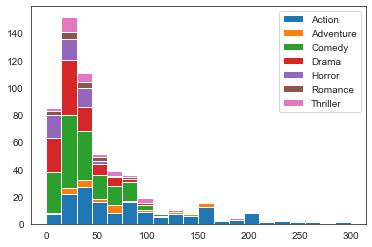

In [255]:
list1 = list()
mylable = list()
for gen in movie.Genre.cat.categories:
       list1.append((movie[movie.Genre == gen].Budget))
       mylable.append(gen)
h = plt.hist(list1,bins =20,stacked=True,rwidth=1,label=mylable) 
plt.legend()
plt.show()
    
      


In [165]:
movie[movie.Film=='30 Days of Night'].Budget

7    32
Name: Budget, dtype: int64

In [171]:
movie.Film.cat.categories

Index(['(500) Days of Summer ', '10,000 B.C.', '12 Rounds ', '127 Hours',
       '17 Again ', '2012', '27 Dresses', '30 Days of Night',
       '30 Minutes or Less', '50/50',
       ...
       'Yes Man', 'Yogi Bear', 'You Again', 'You Don't Mess with the Zohan',
       'You Will Meet a Tall Dark Stranger', 'Your Highness',
       'Youth in Revolt', 'Zodiac', 'Zombieland ', 'Zookeeper'],
      dtype='object', length=559)

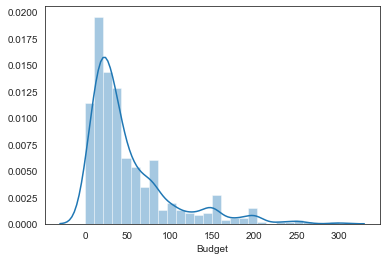

In [268]:
sns.distplot(movie[:].Budget)

In [269]:
movie.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

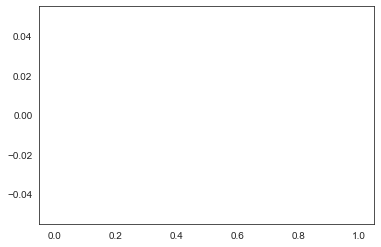

In [281]:
plt.hist(movie[movie.Year == "2010"].Budget)


In [284]:
for yr in movie.Year.cat.categories:
    print(yr)

2007
2008
2009
2010
2011


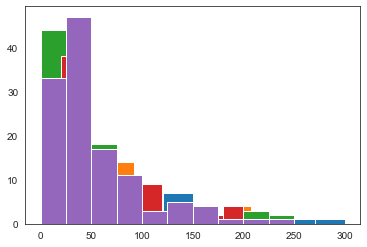

In [287]:
for yr in movie.Year.cat.categories:
    plt.hist(movie[movie.Year == yr].Budget)

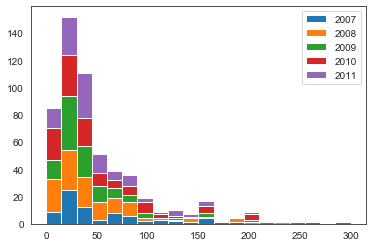

In [299]:
list2 = list()
mylabel1=list()
for yr in movie.Year.cat.categories:
    list2.append(movie[movie.Year == yr].Budget)
    mylabel1.append(yr)
plt.hist(list2,bins=20,stacked=True,label=mylabel1)
plt.legend()
plt.show()

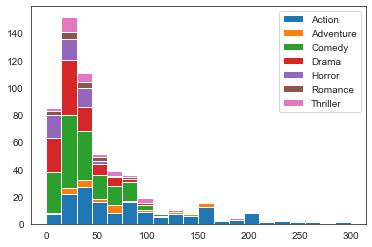

In [323]:
list1 = list()
mylable = list()
for gen in movie.Genre.cat.categories:
       list1.append((movie[movie.Genre == gen].Budget))
       mylable.append(gen)
h = plt.hist(list1,bins =20,stacked=True,rwidth=1,label=mylable) 
plt.legend()
plt.show()
    
      

In [309]:
movie[["Film","Budget","Year"]]

,Film,Budget,Year
0,(500) Days of Summer,8,2009
1,"10,000 B.C.",105,2008
2,12 Rounds,20,2009
3,127 Hours,18,2010
4,17 Again,20,2009
...,...,...,...
554,Your Highness,50,2011
555,Youth in Revolt,18,2009
556,Zodiac,65,2007
557,Zombieland,24,2009


In [327]:
movie[movie.Year ==2010].max()

Film              You Will Meet a Tall Dark Stranger
Genre                                       Thriller
RottenTomatoes                                    96
AudienceRating                                    93
Budget                                           200
Year                                            2010
dtype: object

KDE

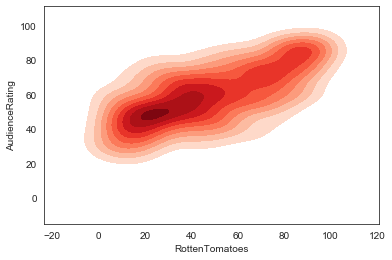

In [344]:
sns.kdeplot(movie.RottenTomatoes,movie.AudienceRating,shade = True,shade_lowest=False,cmap="Reds")
plt.show()


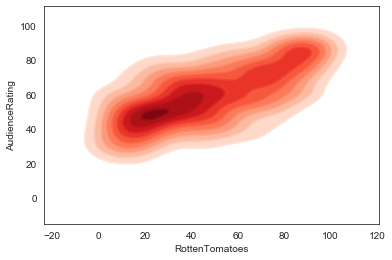

In [345]:
sns.kdeplot(movie.RottenTomatoes,movie.AudienceRating,shade = True,shade_lowest=False,cmap="Reds")
sns.kdeplot(movie.RottenTomatoes,movie.AudienceRating,cmap="Reds")
plt.show()

SUBPLOT()

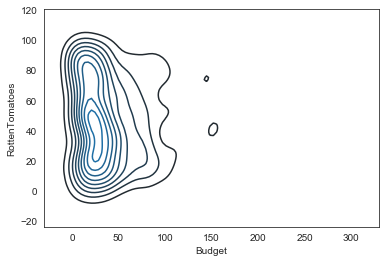

In [348]:
sns.kdeplot(movie.Budget,movie.RottenTomatoes)

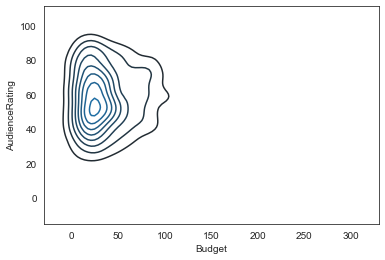

In [350]:
sns.kdeplot(movie.Budget,movie.AudienceRating)

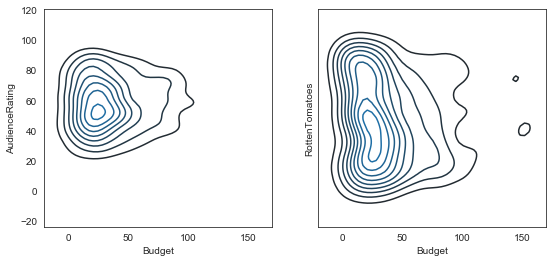

In [376]:
f, axes = plt.subplots(1,2,figsize=(9,4),sharex=True,sharey=True)
k1 = sns.kdeplot(movie.Budget,movie.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movie.Budget,movie.RottenTomatoes,ax=axes[1])
k1.set(xlim=(-20,170))
plt.show()

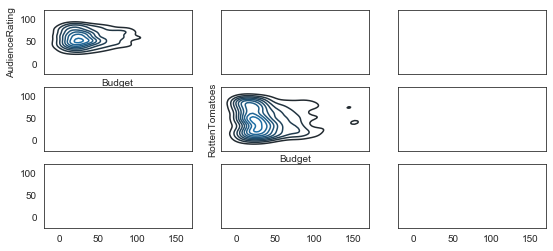

In [395]:
f, axes = plt.subplots(3,3,figsize=(9,4),sharex=True,sharey=True)
k1 = sns.kdeplot(movie.Budget,movie.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movie.Budget,movie.RottenTomatoes,ax=axes[1,1])

k1.set(xlim=(-20,170))
plt.show()

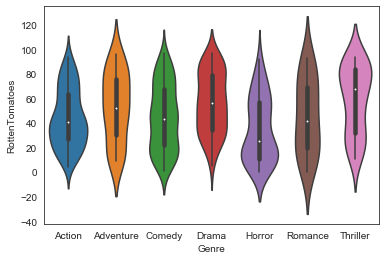

In [401]:
sns.violinplot(data = movie,x ="Genre",y ="RottenTomatoes" )


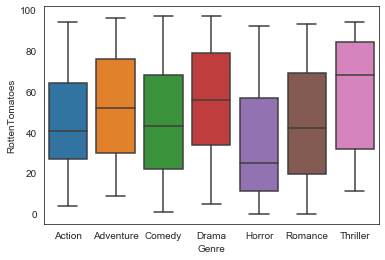

In [403]:
sns.boxplot(data = movie,x ="Genre",y ="RottenTomatoes")

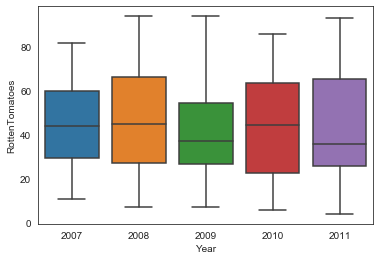

In [408]:
sns.boxplot(data = movie[movie.Genre =="Action"], x ="Year" ,y ="RottenTomatoes")

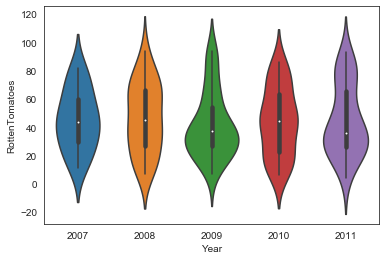

In [415]:
sns.violinplot(data = movie[movie.Genre =="Action"], x ="Year" ,y ="RottenTomatoes")

In [417]:
movie

,Film,Genre,RottenTomatoes,AudienceRating,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [422]:
movie[(movie.Budget > 100) & (movie.AudienceRating>90)]

,Film,Genre,RottenTomatoes,AudienceRating,Budget,Year
33,Avatar,Action,83,92,237,2009
190,Inception,Action,86,93,160,2010
196,Iron Man,Action,94,91,186,2008
362,Star Trek,Action,94,91,140,2009
394,The Bourne Ultimatum,Thriller,93,91,110,2007
406,The Dark Knight,Thriller,94,96,185,2008


FACET GRID

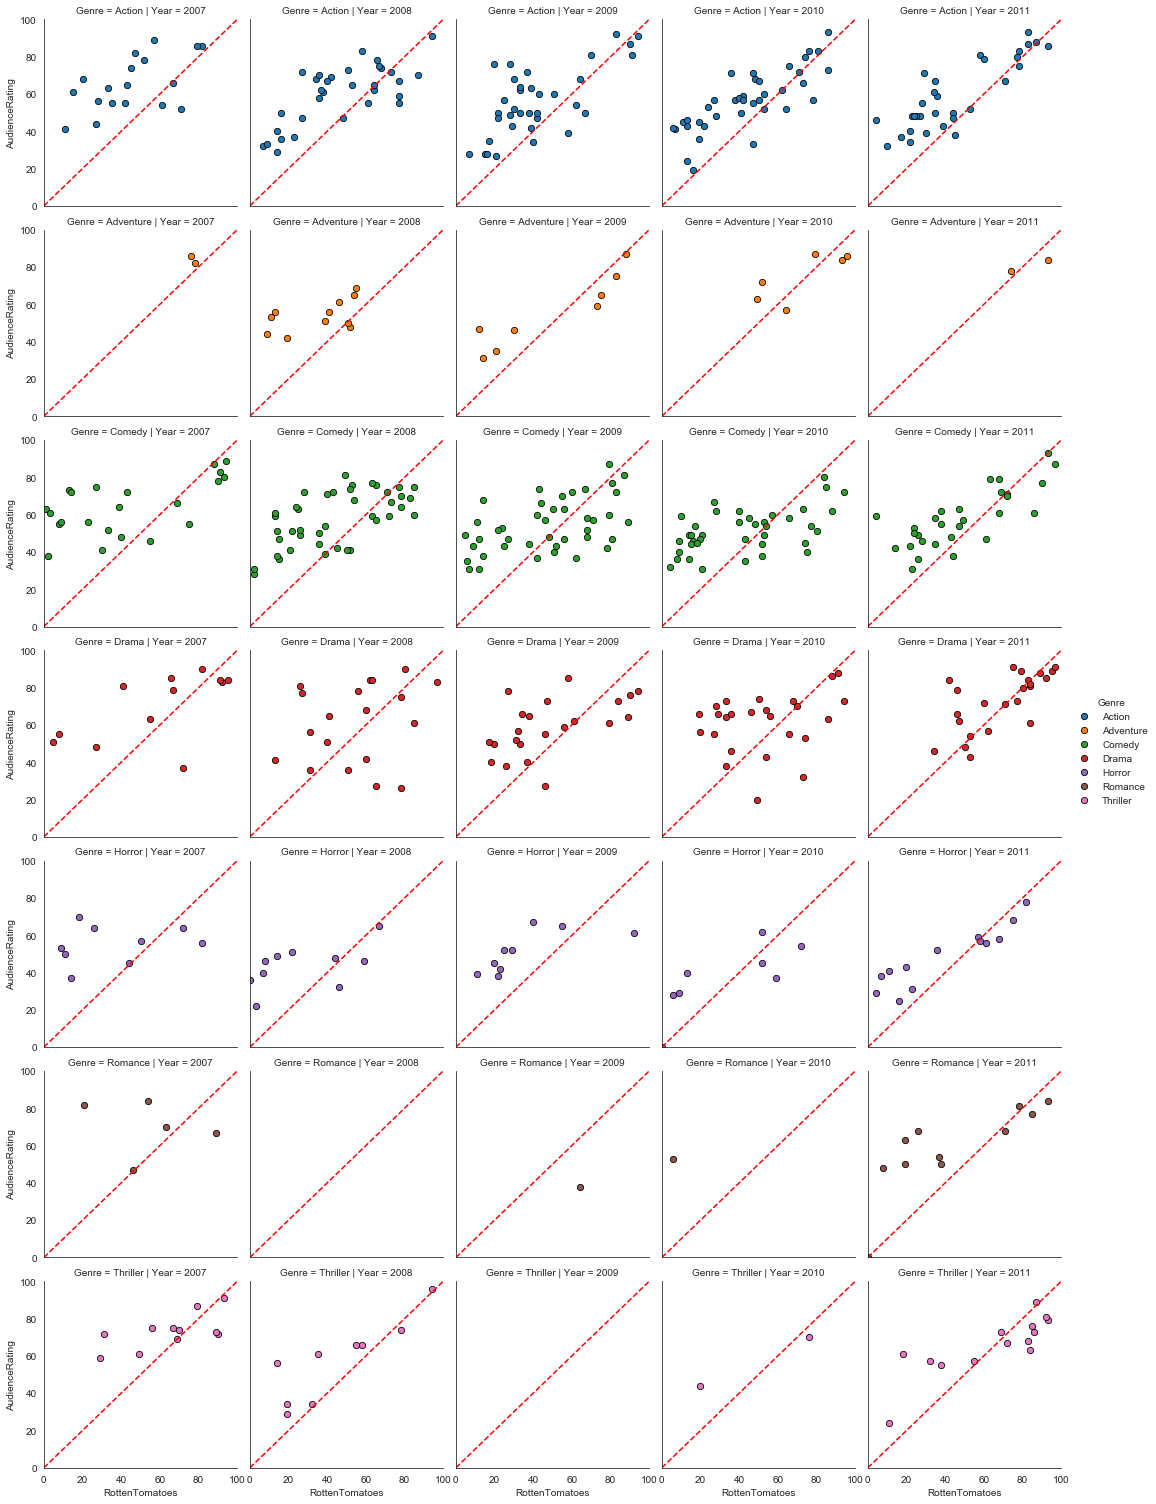

In [473]:
g = sns.FacetGrid(movie,row = "Genre" ,col = "Year" ,hue = "Genre")
Kwargs =dict(s= 40 ,linewidth = 0.8, edgecolor = "black")
g = g.map(plt.scatter,"RottenTomatoes","AudienceRating",**Kwargs)
g.set(xlim=(0,100),ylim=(0,100))
for x in g.axes.flat:
    x.plot((0,100),(0,100),c = "red" , ls = "--")
g.add_legend()    
plt.show()

In [471]:
len(movie.Genre.cat.categories)

7

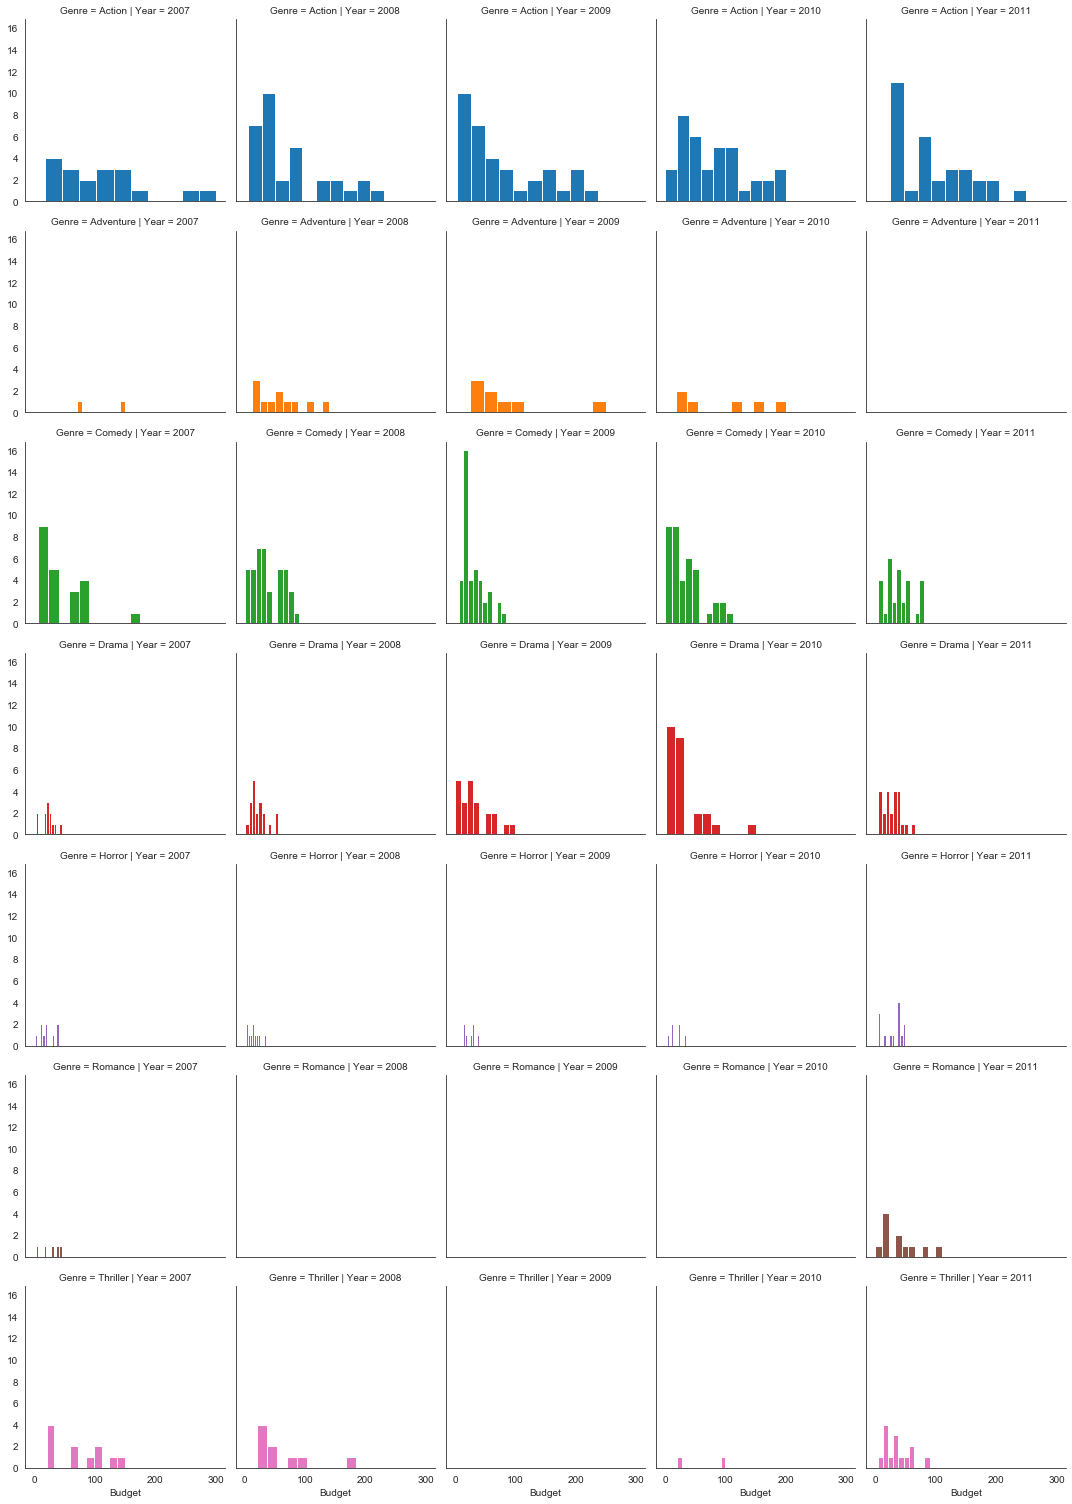

In [459]:

g = sns.FacetGrid(movie,row = "Genre" ,col = "Year" ,hue = "Genre")

g = g.map(plt.hist,"Budget")


DASHBOARD

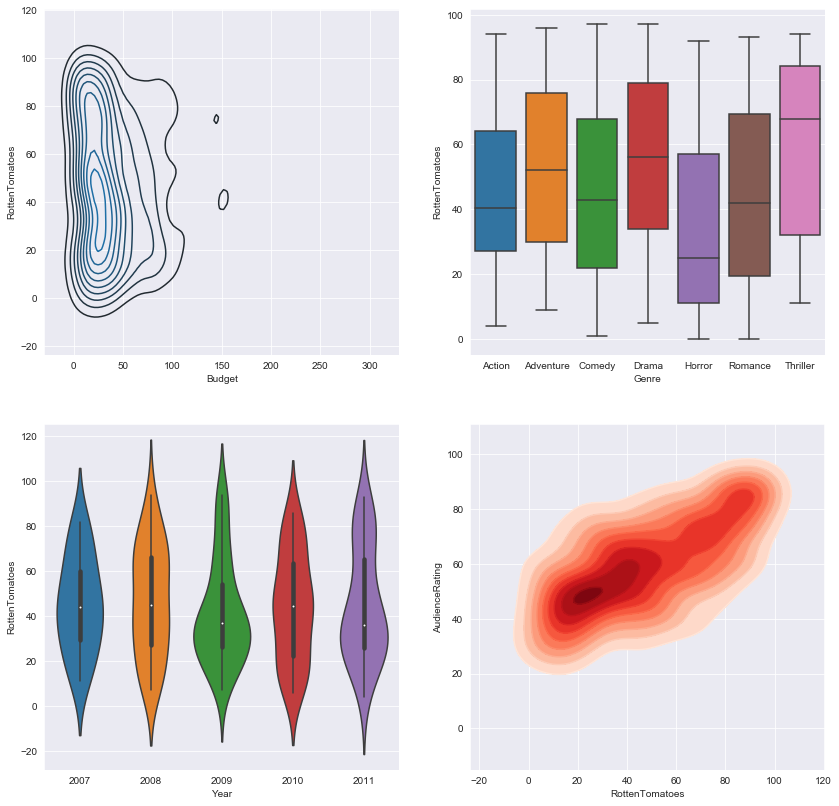

In [491]:
sns.set_style("darkgrid")
f,axes = plt.subplots(2,2 , figsize =(14,14))
k1  = sns.kdeplot(movie.Budget,movie.RottenTomatoes, ax=axes[0,0])
k2 = sns.boxplot(data = movie,x ="Genre",y ="RottenTomatoes",ax = axes[0,1])
k3 =sns.violinplot(data = movie[movie.Genre =="Action"], x ="Year" ,y ="RottenTomatoes",ax =axes[1,0])
k4 = sns.kdeplot(movie.RottenTomatoes,movie.AudienceRating,shade = True,shade_lowest=False,cmap="Reds",ax=axes[1,1])
k44 = sns.kdeplot(movie.RottenTomatoes,movie.AudienceRating,cmap="Reds",ax=axes[1,1])
plt.show()

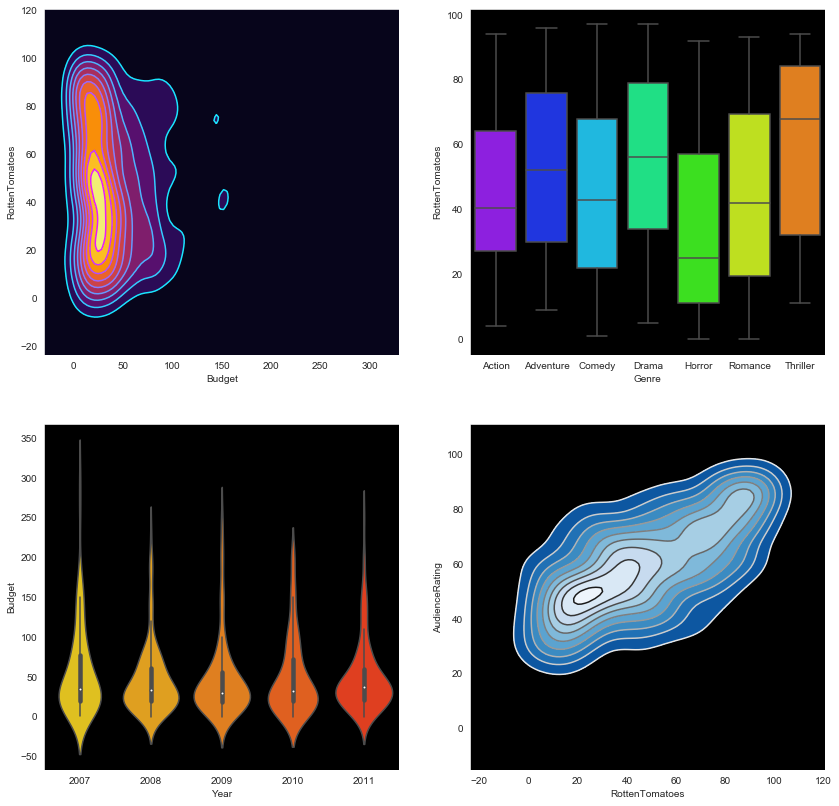

In [514]:
sns.set_style("dark",{"axes.facecolor":"black"})
f,axes = plt.subplots(2,2 , figsize =(14,14))
k1  = sns.kdeplot(movie.Budget,movie.RottenTomatoes, ax=axes[0,0],shade = True,shade_lowest=True,cmap="inferno")
k1  = sns.kdeplot(movie.Budget,movie.RottenTomatoes, ax=axes[0,0],cmap="cool")
k2 = sns.boxplot(data = movie,x ="Genre",y ="RottenTomatoes",ax = axes[0,1],palette="gist_rainbow_r")

k3 =sns.violinplot(data = movie, x ="Year" ,y ="Budget",ax =axes[1,0],palette="autumn_r")

k4 = sns.kdeplot(movie.RottenTomatoes,movie.AudienceRating,shade = True,shade_lowest=False,cmap="Blues_r",ax=axes[1,1])
k44 = sns.kdeplot(movie.RottenTomatoes,movie.AudienceRating,cmap="gist_gray_r",ax=axes[1,1])
plt.show()

styling dashboards

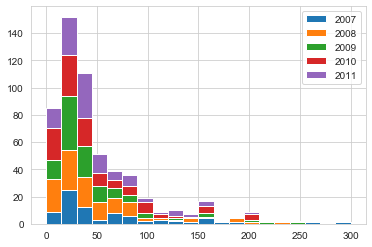

In [516]:
sns.set_style("whitegrid")
list2 = list()
mylabel1=list()
for yr in movie.Year.cat.categories:
    list2.append(movie[movie.Year == yr].Budget)
    mylabel1.append(yr)
plt.hist(list2,bins=20,stacked=True,label=mylabel1)
plt.legend()
plt.show()